# K-Nearest Neighbors (KNN) on the Diamonds Dataset

### Problem Statement

The goal of this project is to build a predictive model using the K-Nearest Neighbors (KNN) algorithm to understand how various physical and qualitative attributes of diamonds influence their price.

Using the publicly available Diamonds dataset, we aim to:

- Analyze the relationship between diamond characteristics and their price,

- Build a KNN model to predict diamond price, and

- Evaluate model performance using appropriate metrics such as accuracy, confusion matrix, and classification report.

This problem is an example of supervised learning, where we use known data (diamonds with labeled features and prices) to predict the outcome for new data.

### Dataset

The Diamonds dataset is one of the most popular datasets for regression and classification tasks.
It contains the physical and qualitative attributes of over 53,000 diamonds, along with their selling prices.

| **Column Name** | **Type**                                 | **Description**                                                                                                             |
| --------------- | ---------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| **carat**       | Numeric (float)                          | Weight of the diamond (0.2–5.01). Heavier diamonds are usually more expensive.                                              |
| **cut**         | Categorical                              | Quality of the cut: *Fair, Good, Very Good, Premium, Ideal*. Higher cut quality often leads to higher brilliance and price. |
| **color**       | Categorical                              | Diamond color grading from *D (best, colorless)* to *J (worst, slightly tinted)*.                                           |
| **clarity**     | Categorical                              | Measurement of how clear the diamond is: *I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF* (from lowest to highest clarity).         |
| **depth**       | Numeric                                  | Total depth percentage = (z / mean(x, y)) × 100.                                                                            |
| **table**       | Numeric                                  | Width of the top of the diamond relative to the widest point.                                                               |
| **price**       | Numeric (target variable for regression) | Price in US dollars.                                                                                                        |
| **x**           | Numeric                                  | Length of the diamond in mm.                                                                                                |
| **y**           | Numeric                                  | Width of the diamond in mm.                                                                                                 |
| **z**           | Numeric                                  | Depth (height) of the diamond in mm.                                                                                        |



In [1]:
#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p style="color:#000; font-size:18px;">There is an <b>Unnamed: 0</b> column which needs to be dropped.<br>
</p>

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p style="color:#000; font-size:18px;">Feature <b>cut</b>,<b>color</b> and <b>clarity</b> have categorical string values which will require handling later.</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<p style="color:#000; font-size:18px;">Except for the 3 columns, all other features have numeric type so no type-casting is required</p>

In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<p style="color:#000; font-size:18px;">Luckily there are no null values so no cleaning is required.</p>

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id='section-4'></a>
<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Exploratory Data Analysis</p>

In [10]:
for col in df.select_dtypes(exclude=['number']).columns:
        print(col,df[col].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<p style="color:#000; font-size:18px;">The 3 string features contain categorical data so we can Encode them to Integers for regression purpose.<br>

Text(0, 0.5, 'Count')

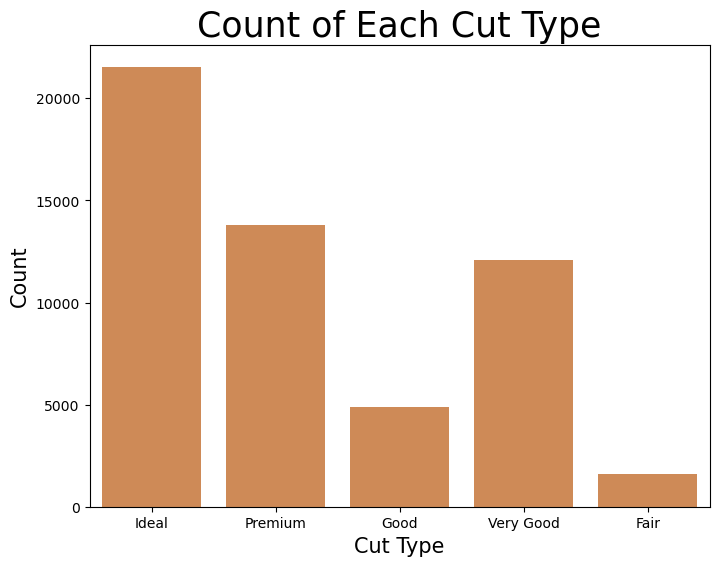

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='cut',data=df, color="#e28743")
plt.title('Count of Each Cut Type',fontsize=25,fontweight=5)
plt.xlabel('Cut Type',fontsize=15,fontweight=3)
plt.ylabel('Count',fontsize=15,fontweight=3)

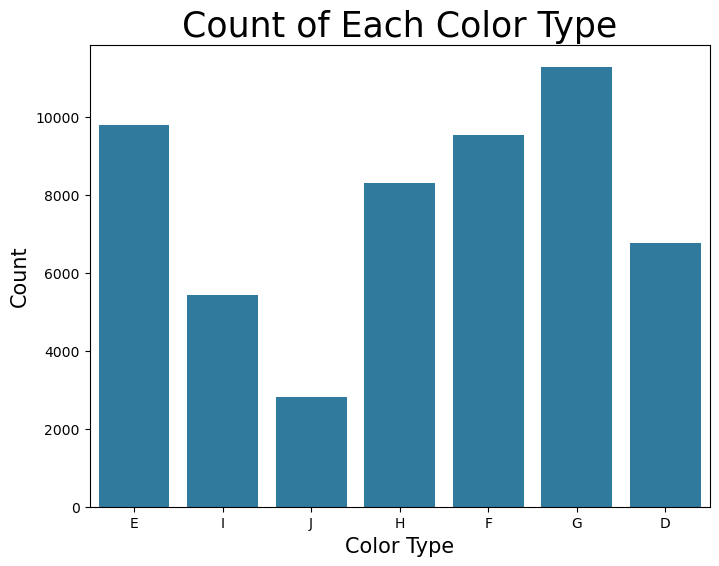

In [12]:
plt.figure(figsize=(8,6));
sns.countplot(x='color',data=df,color='#1e81b0');
plt.title('Count of Each Color Type',fontsize=25,fontweight=5);
plt.xlabel('Color Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

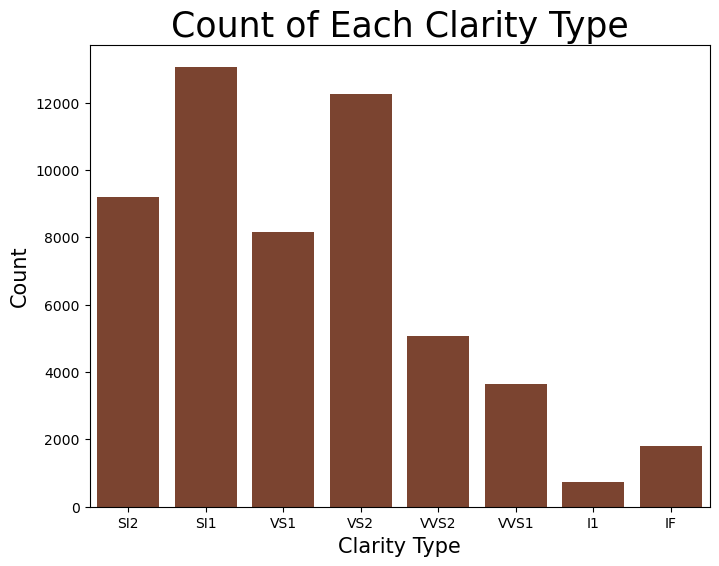

In [13]:
plt.figure(figsize=(8,6));
sns.countplot(x='clarity',data=df,color='#873e23');
plt.title('Count of Each Clarity Type',fontsize=25,fontweight=5);
plt.xlabel('Clarity Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

<p style="color:#000; font-size:18px;">Let's encode these features and move to further analysis</p>

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
# # OrdinalEncoder is almost the same as LabelEncoder, except it can encode multiple features in one go, 
# # as well as enforce user-defined order.

# ordinal_encoder = OrdinalEncoder(categories = [
#     ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],        #cut
#     ['J', 'I', 'H', 'G', 'F', 'E', 'D'],                      #color
#     ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  #clarity
# ])

# columns_to_encode = ['cut', 'color', 'clarity']

# df[columns_to_encode] = ordinal_encoder.fit_transform(df[columns_to_encode])

# df.head()

<!-- from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False, drop='first') 
# dense matrix stores all elements, including zeros. Each element, whether zero or non-zero, takes up space in the memory.
# sparse matrix stores only non-zero elements. The locations and values of these non-zero elements are recorded, 
# but zeros are not stored.

columns_to_encode = ['cut', 'color', 'clarity']

encoded_data = onehot_encoder.fit_transform(df[columns_to_encode])

encoded_df = pd.DataFrame(
    encoded_data, 
    columns=onehot_encoder.get_feature_names_out(columns_to_encode)
)

df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

df.head() -->

In [16]:
cut_encoder = LabelEncoder()
color_encoder = LabelEncoder()
clarity_encodeer = LabelEncoder()

In [17]:
df['cut'] = cut_encoder.fit_transform(df['cut'])
df['color'] = color_encoder.fit_transform(df['color'])
df['clarity'] = clarity_encodeer.fit_transform(df['clarity'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


<p style="color:#000; font-size:18px;">All our data is of numeric type now!</p>

<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">Correlation Heatmap</p>

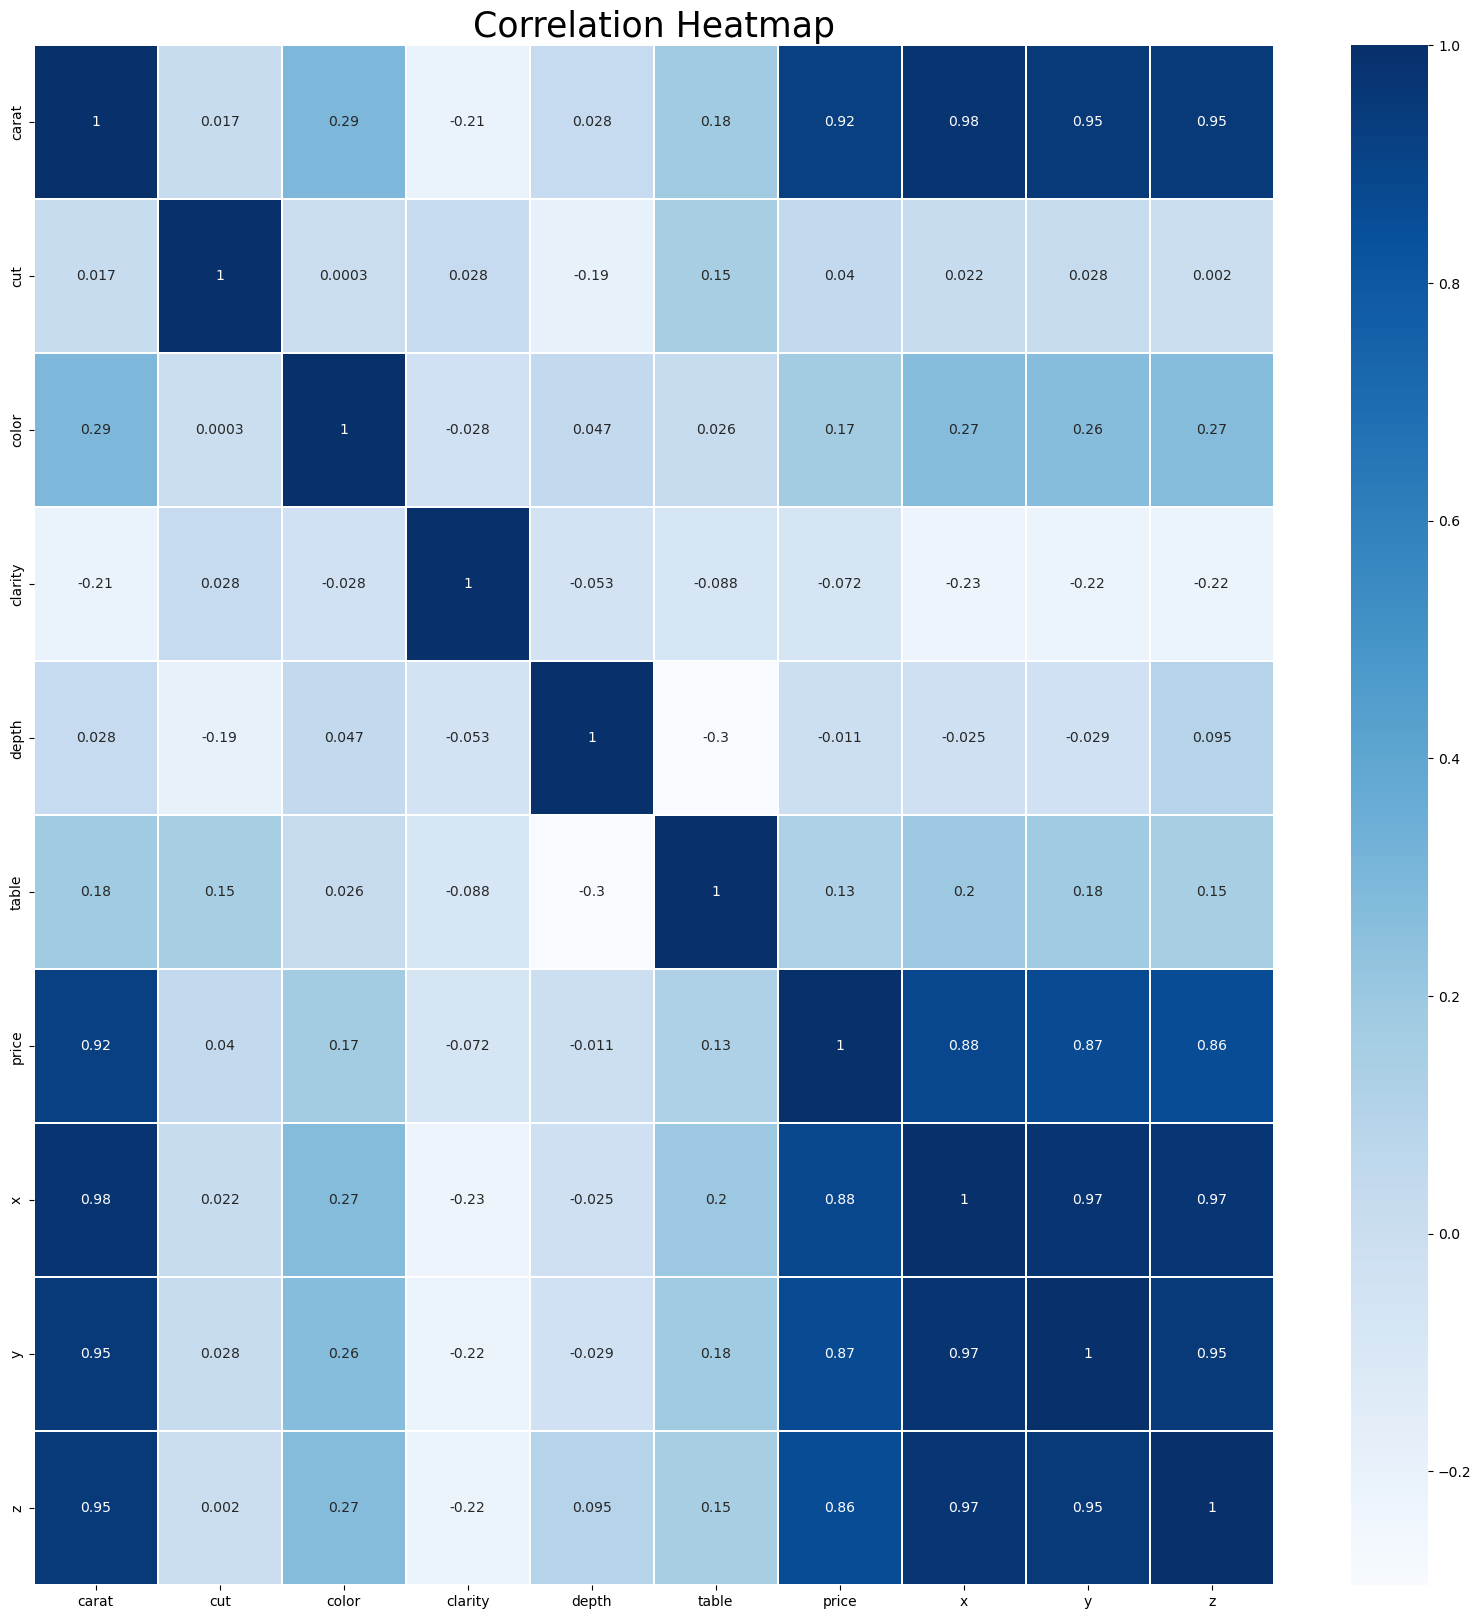

In [19]:
plt.figure(figsize=(20,20));
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=0.01);
plt.title('Correlation Heatmap',fontsize=25,fontweight=5);

<p style="color:#000; font-size:18px;">Our problem statement is predicting price of diamond.<br>
    So if we look at the price feature in the above correlation matrix, we can see that it is highly correlated with the <b>carat,x,y & z</b> features.<br>
Let's see this correlation using a scatterplot</p>

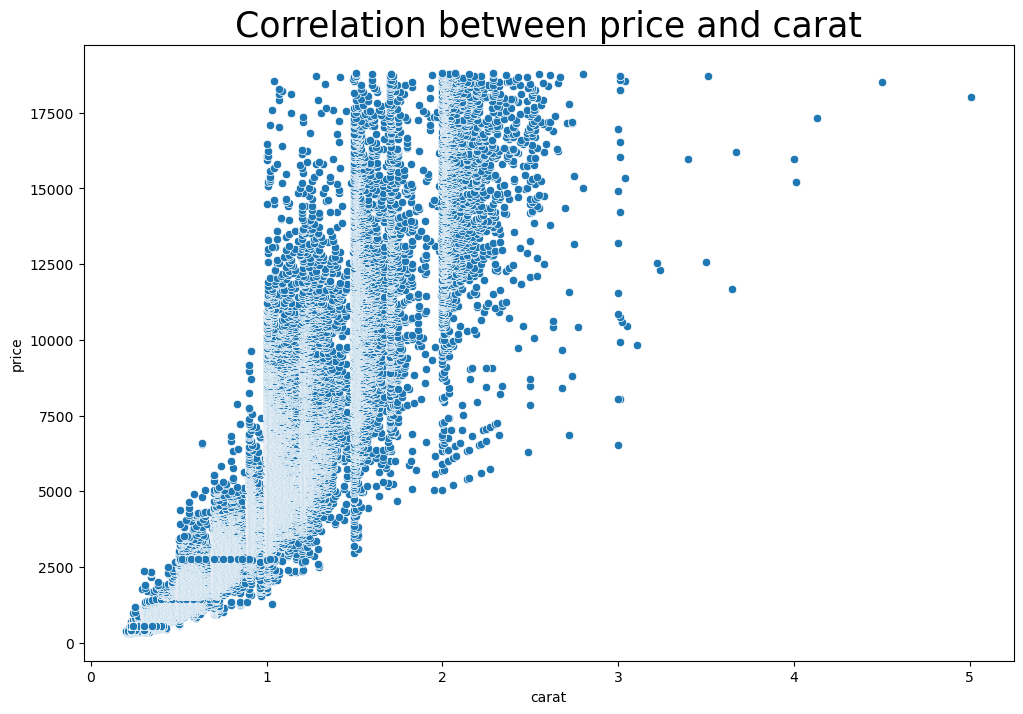

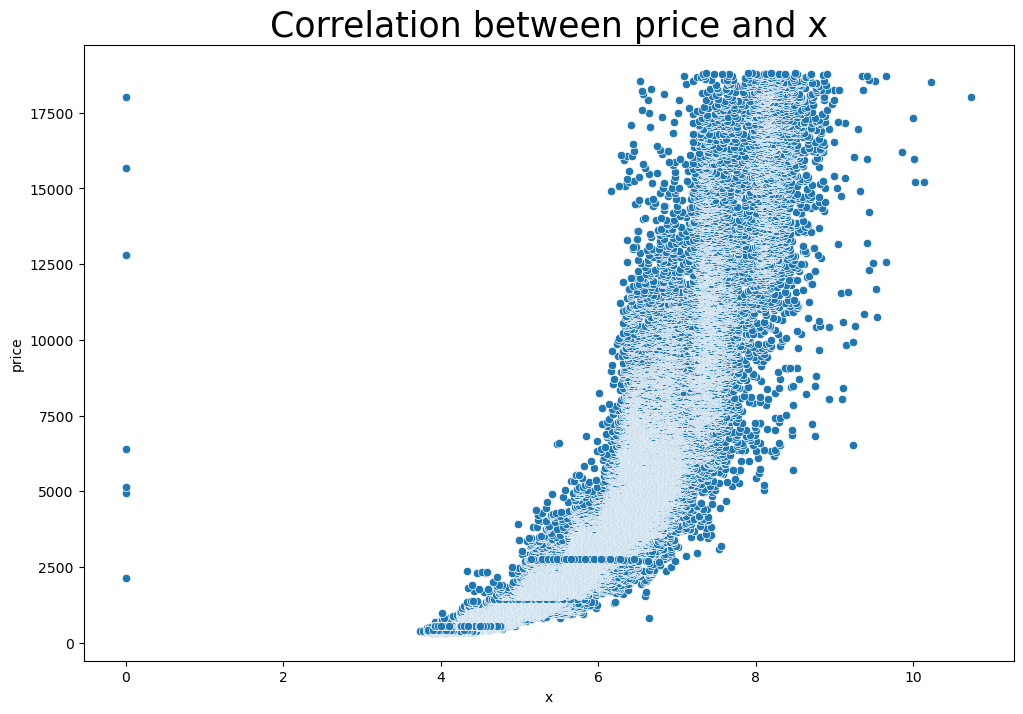

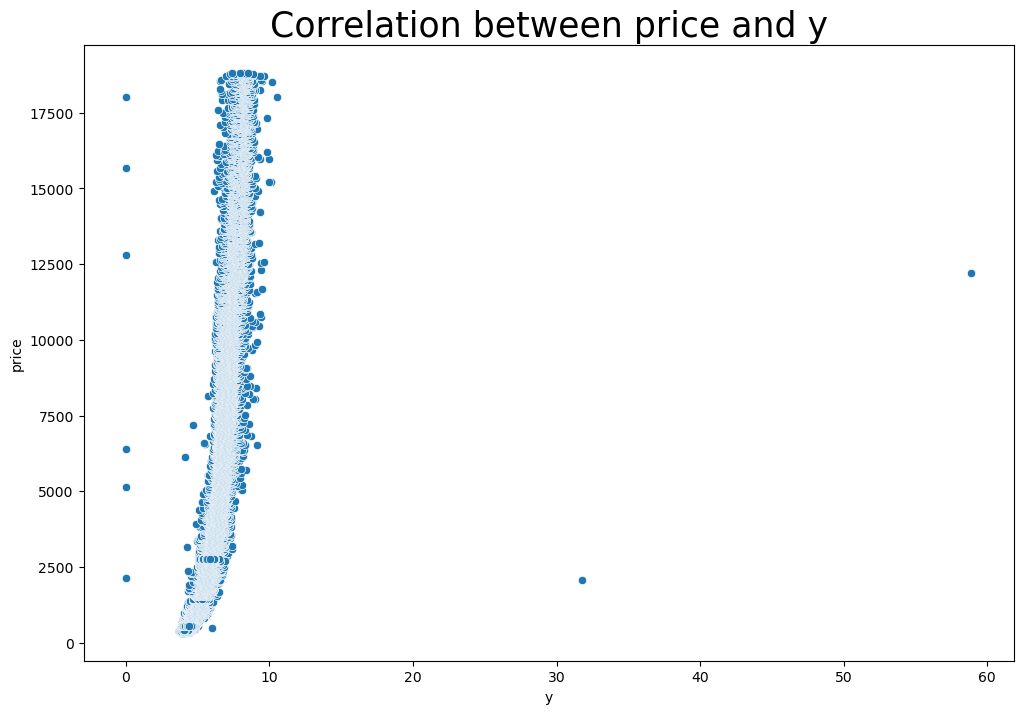

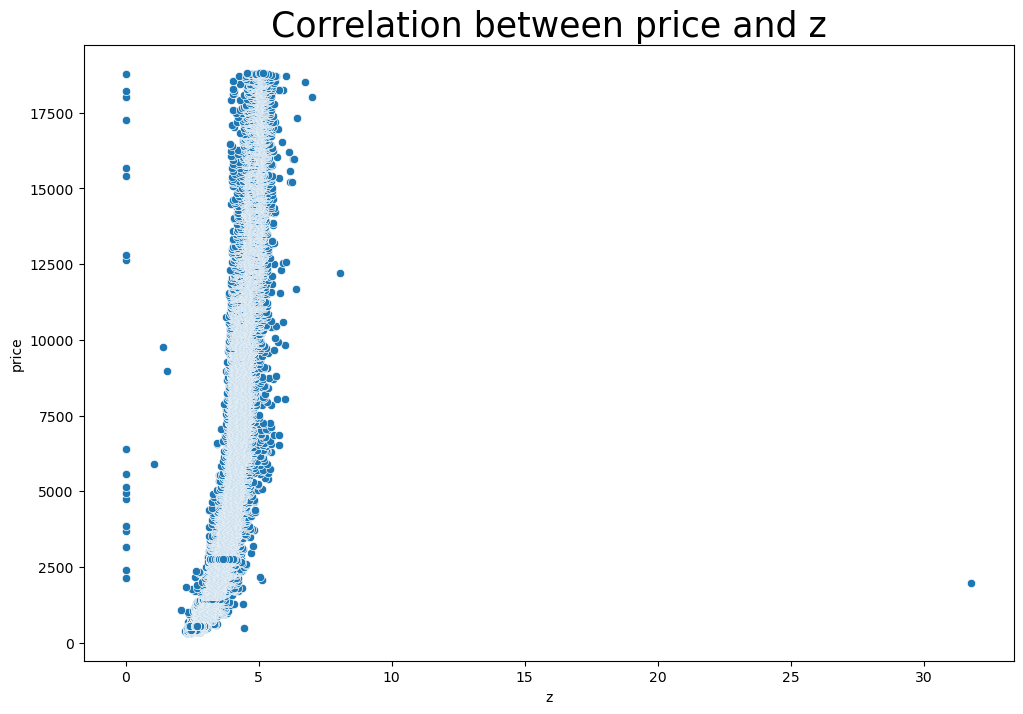

In [20]:
for col in ['carat','x','y','z']:
    plt.figure(figsize=(12,8));
    sns.scatterplot(x=col, y='price', data=df);
    plt.title(f'Correlation between price and {col}',fontsize=25,fontweight=5);
    plt.show()

<p style="color:#000; font-size:18px;">As seen in the correlation heatmap, the correlations are clearly visible</p>

<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">Box Plot</p>
<div style="text-align:center">
<p style="color:#000; font-size:18px; text-align:center;">A Box Plot is used to find outliers or values that are too large or too small.<br>These values can affect the performance of our regression model.</p>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="1000px">
<p style="color:#000; font-size:18px;">A box plot finds the IQR(Interquartile range). Most of the data lies in this range and based on the Q1 and Q3 values, the minimum and maximum values are calculated. Note these values are not the minimum/maximum of the feature. These minimum/maximum are calculated by the boxplot using Q1,Q3 and any value outside our box range can be considered as an outlier.</p>

</div>

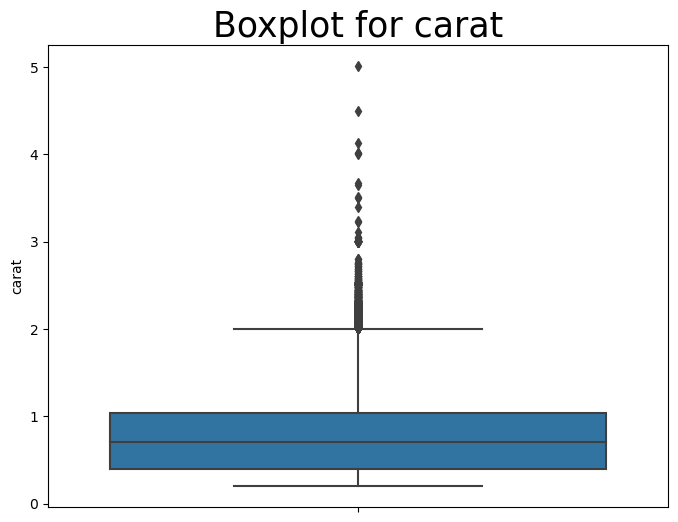

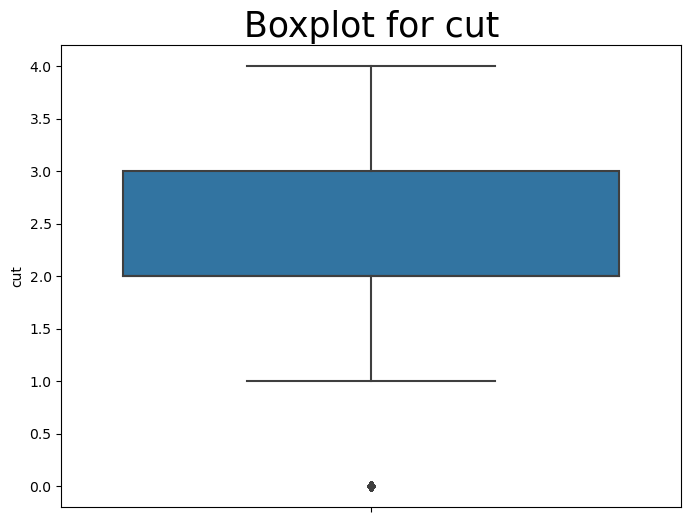

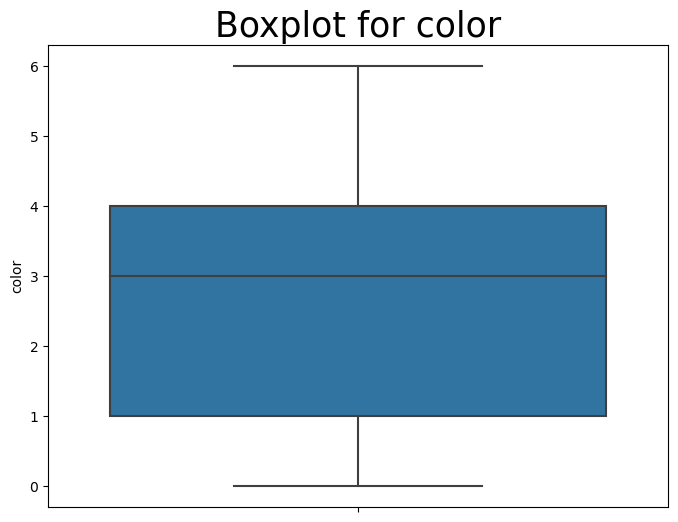

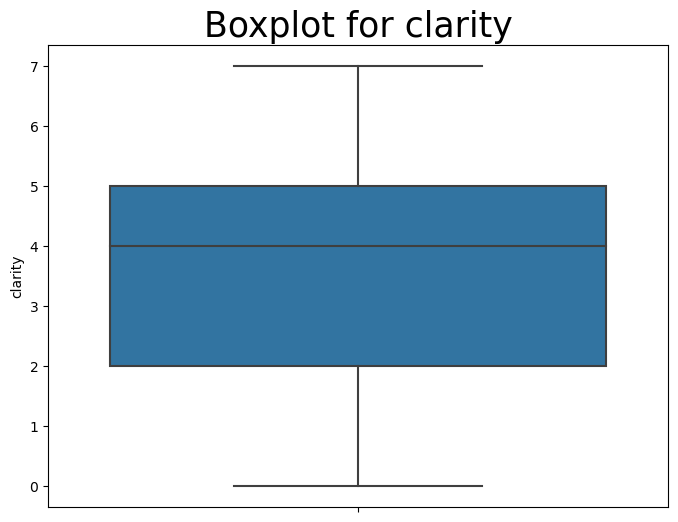

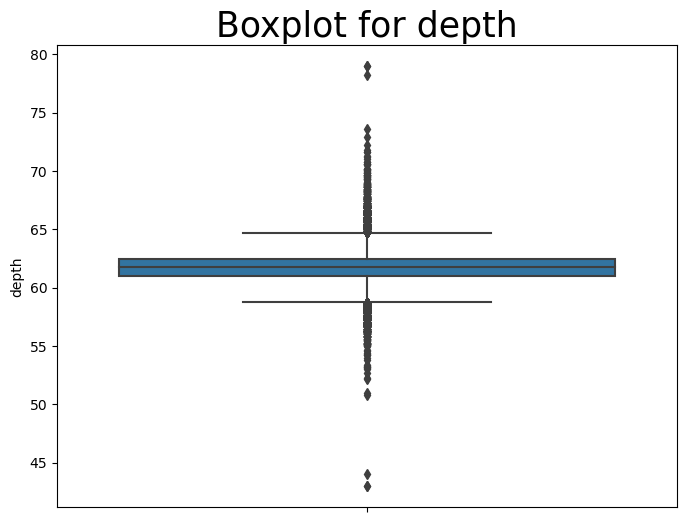

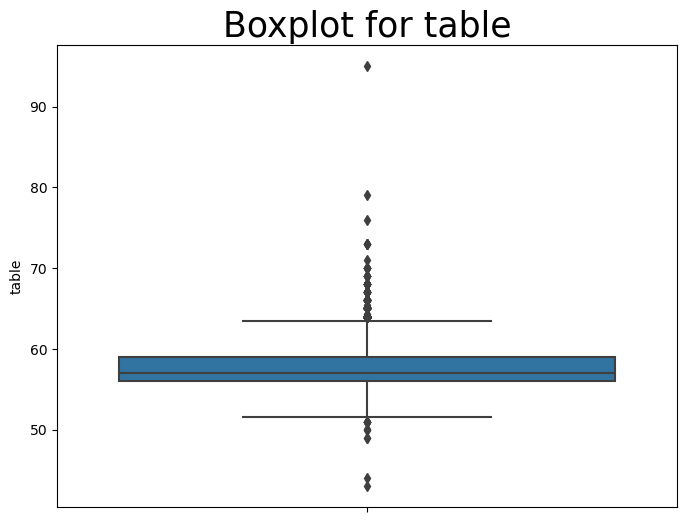

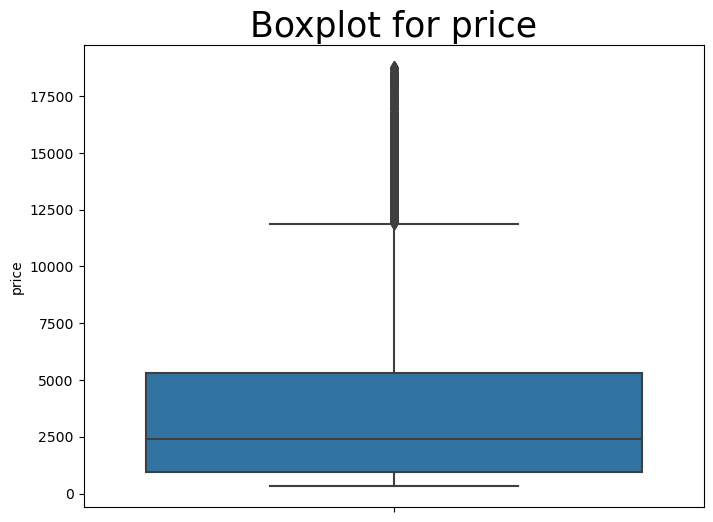

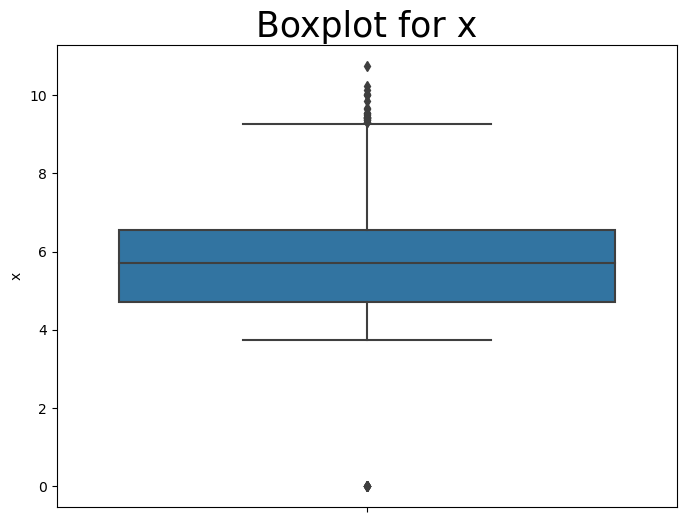

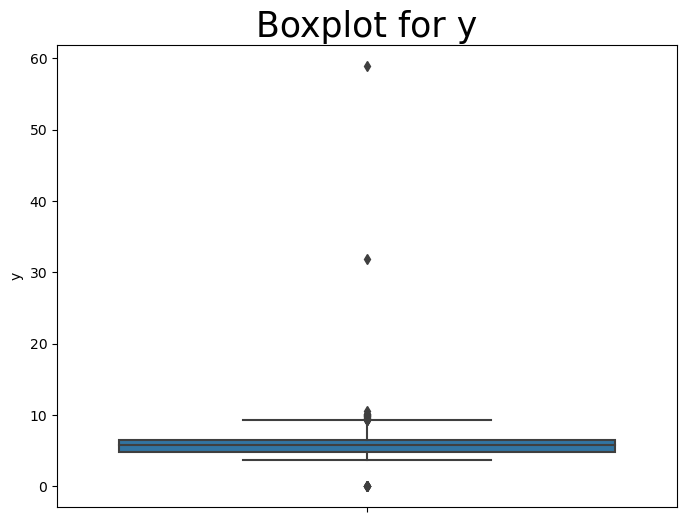

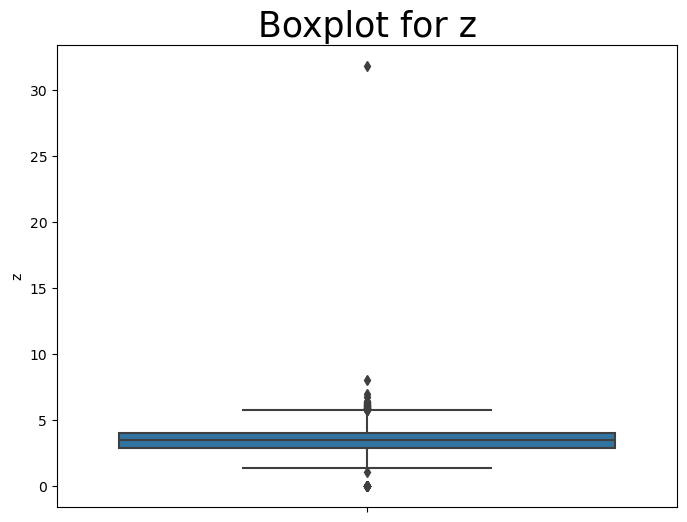

In [21]:
for col in df.columns:
    plt.figure(figsize=(8,6));
    sns.boxplot(y=col, data=df);
    plt.title(f'Boxplot for {col}',fontsize=25,fontweight=5);
    plt.show()

<p style="color:#000; font-size:18px;">I am going to remove most of the outliers using the Q1,Q3 values.</p>

In [22]:
for col in df.columns:
    #calculating Q1 for the feature
    q1 = df[col].quantile(0.25)
    #calculating Q3 for the feature
    q3 = df[col].quantile(0.75)
    
    #Calculating the IQR value
    iqr = q3-q1
    # Calculating min/max value based on IQR
    minn = q1-1.5*iqr
    maxx = q3+1.5*iqr
    
    # Filtering values only in the min-max range
    df = df[(df[col] >= minn) & (df[col] <= maxx)]

In [23]:
df.shape

(46596, 10)

<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Split and Normalization</p>


In [24]:
X = df.drop(['price'],axis=1)
y=df['price']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
scaler = MinMaxScaler()

In [27]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [28]:
normalized_x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.277778,1.000000,0.166667,0.285714,0.677966,0.363636,0.431718,0.440789,0.591281
1,0.577778,1.000000,0.500000,0.714286,0.457627,0.545455,0.696035,0.708333,0.773842
2,0.055556,0.333333,0.666667,1.000000,0.338983,0.545455,0.132159,0.146930,0.337875
3,0.088889,0.666667,0.500000,0.571429,0.491525,0.636364,0.180617,0.192982,0.384196
4,0.027778,1.000000,0.500000,0.857143,0.711864,0.181818,0.063877,0.072368,0.307902


In [29]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Modelling</p>

In [30]:
d={}
def metric_scores(actual,predicted,name):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = mse**0.5
    r2 = r2_score(actual,predicted)
    
    d[name]=[mae,mse,rmse,r2]
    
    print('Mean Absolute Error is {:.3f}'.format(mae))
    print('Mean Squared Error is {:.3f}'.format(mse))
    print('Root Mean Squared Error is {:.3f}'.format(rmse))
    print('R Squared Score is {:.3f}'.format(r2))

In [31]:
def evaluate_model(x_test=None, y_test=None, model=None, name='Linear Regression'):
    predicted = model.predict(x_test)
    actual = y_test
    metric_scores(actual, predicted, name)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(actual, predicted, c='k')
    
    # Calculate maximum and minimum values for setting axis limits
    mxp, mxa, mnp, mna = max(predicted), max(actual), min(predicted), min(actual)
    max_val = max(mxp, mxa)  # Largest value for max limit
    min_val = min(mnp, mna)  # Smallest value for min limit
    
    plt.plot([min_val, max_val], [min_val, max_val], 'r')  # Line showing perfect prediction
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name, fontsize=30)
    
    # Set the same range for both axes
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    plt.show()


Mean Absolute Error is 279.905
Mean Squared Error is 250229.673
Roor Mean Squared Error is 500.230
R Squared Error is 0.963


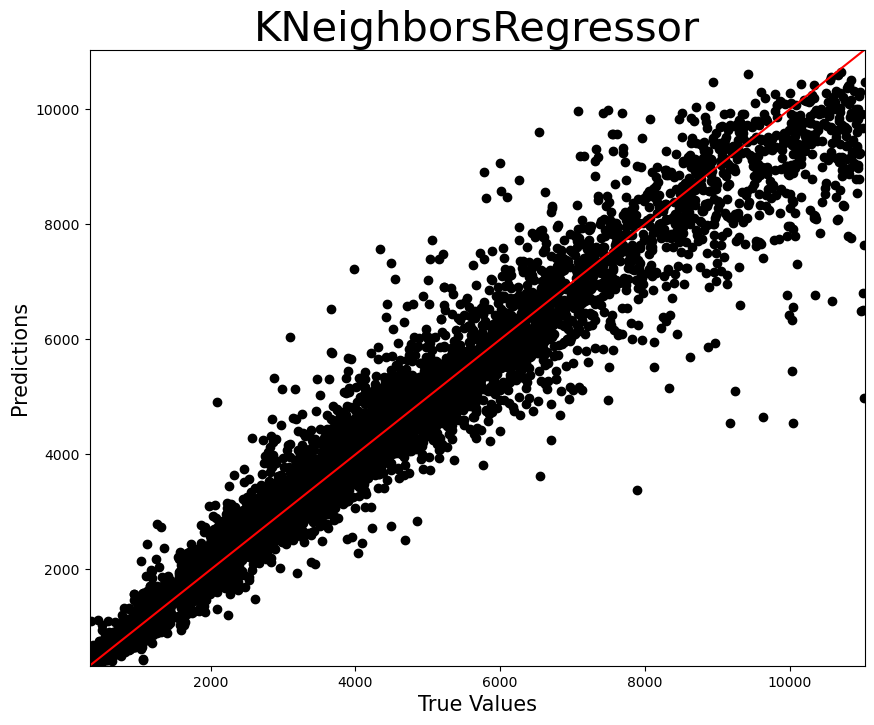

In [32]:
knn = KNeighborsRegressor()
knn.fit(normalized_x_train,y_train)
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=knn,name='KNeighborsRegressor')

Mean Absolute Error is 564.595
Mean Squared Error is 721805.115
Roor Mean Squared Error is 849.591
R Squared Error is 0.894


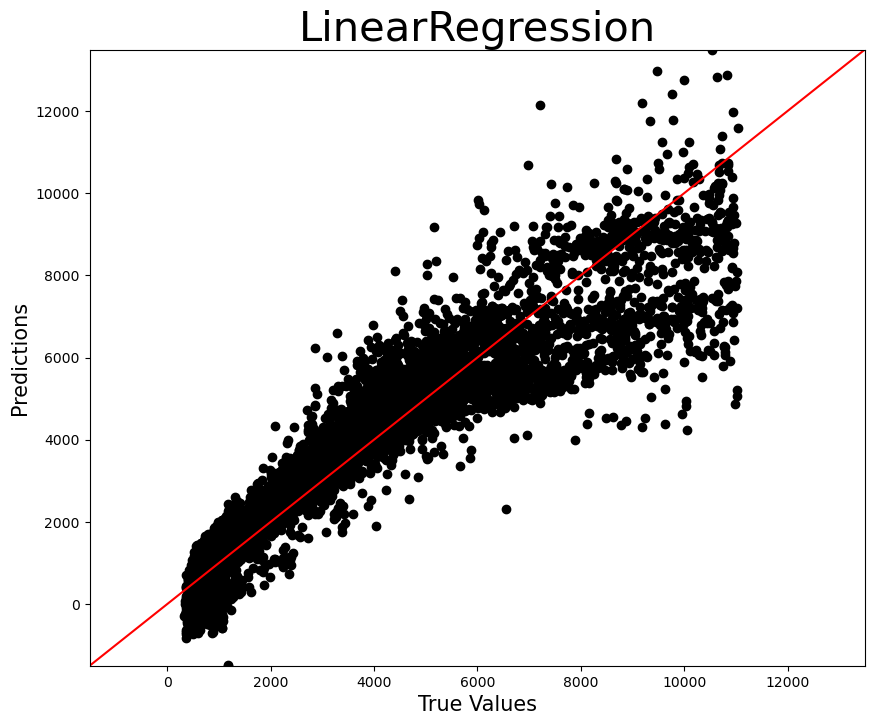

In [33]:
lr = LinearRegression()
lr.fit(normalized_x_train,y_train)
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=lr,name='LinearRegression')

<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Comparing Models</p>

In [34]:
results = pd.DataFrame(d,index = ['MAE','MSE','RMSE','R2'])

In [35]:
results

,KNeighborsRegressor,LinearRegression
MAE,279.905429,564.595326
MSE,250229.672562,721805.114805
RMSE,500.229620,849.591146
R2,0.963080,0.893502


<p style="background-color:#006699;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Hyperparameter Tuning</p>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mean Absolute Error is 242.840
Mean Squared Error is 195541.560
Roor Mean Squared Error is 442.201
R Squared Error is 0.971


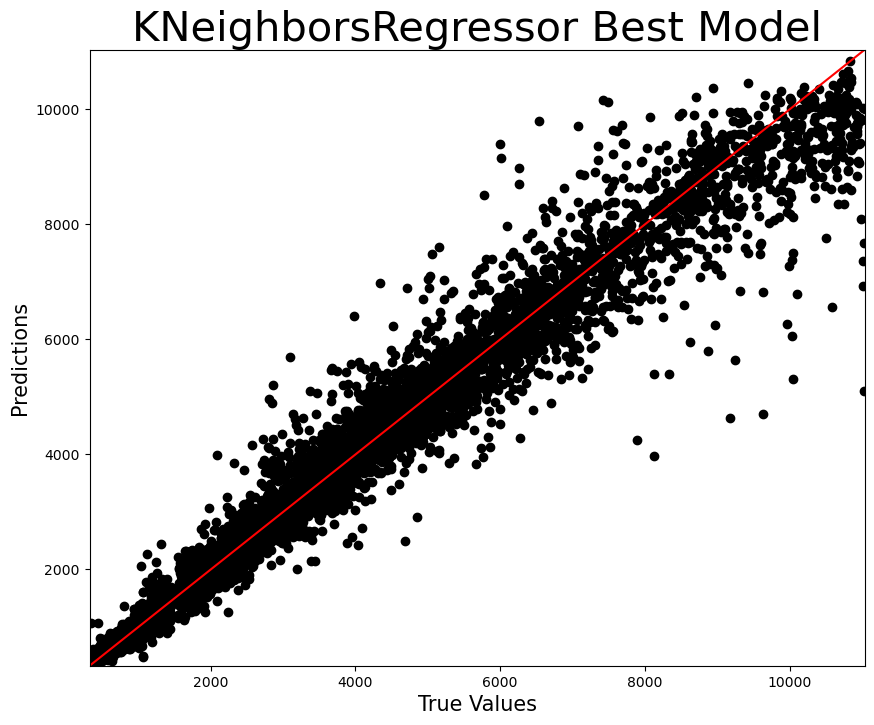

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [36]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# https://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

grid_search.fit(normalized_x_train, y_train)

best_knn = grid_search.best_estimator_

evaluate_model(x_test=normalized_x_test, y_test=y_test, model=best_knn, name='KNeighborsRegressor Best Model')

print("Best parameters found: ", grid_search.best_params_)

Mean Absolute Error is 242.840
Mean Squared Error is 195541.560
Roor Mean Squared Error is 442.201
R Squared Error is 0.971


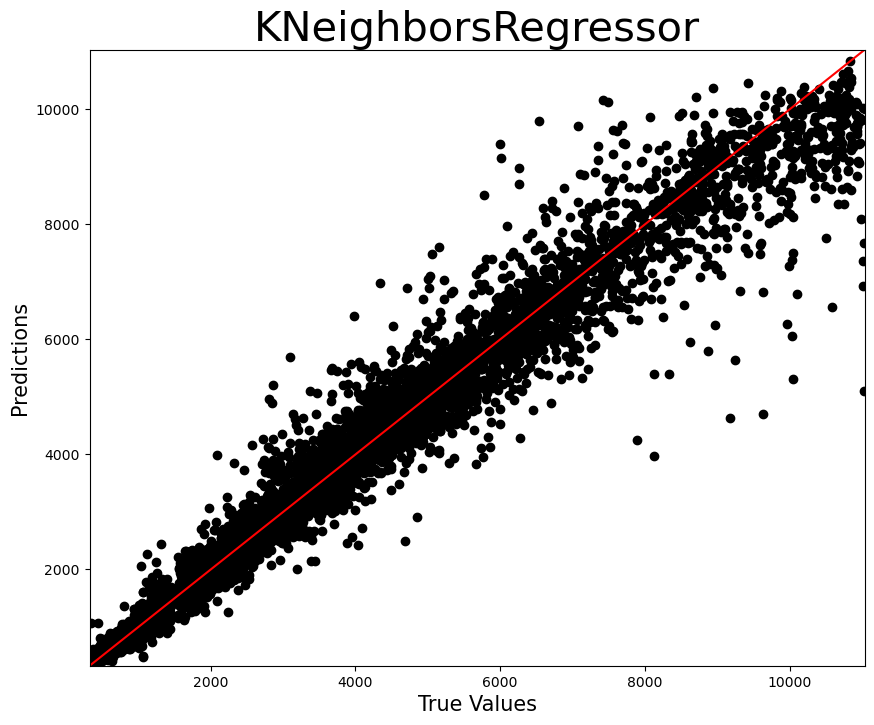

In [37]:
knn = KNeighborsRegressor(n_neighbors=7, metric='manhattan', weights='distance')
knn.fit(normalized_x_train,y_train)
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=knn,name='KNeighborsRegressor')